## Exploring Cleaning and Wrangling Part 02
### this is starting from new data which includes games played info Sourced from SullyGnome.com


In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [2]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections
!{sys.executable} -m pip install xgboost

from collections import namedtuple
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
### This works but I should create a function that reads in the data.  

In [4]:
# twitch_df = pd.read_csv("twitch_clean_data_Kelly.csv", parse_dates=["Date"])
# twitch_df.head()

In [5]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

In [6]:
def load_twitch_data():
    cols = list(pd.read_csv("twitch_clean_data_Kelly02.csv", nrows=1))
    df = pd.read_csv("twitch_clean_data_Kelly02.csv", parse_dates=["Date"],
                    usecols = [i for i in cols if i !="Unnamed: 71"])
    return df

In [7]:
twitch_original_df = load_twitch_data()


In [8]:
twitch_original_df.head()

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462
2,2017-06-15,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.45,40,3,0,0,2,0.0,1,8,89,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3,0.100000,40,300
3,2017-06-16,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923,38.46153846
4,2017-06-17,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333,66.66666667


In [9]:
twitch_df = twitch_original_df.copy()

### Ultimately I need to make a decision about how to split this data.

I think since her followers grow over time, I think the model should be given a random range of dates

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(twitch_df, minimal=True).to_notebook_iframe()

profile

## Wrangle - 
    Date as index 
    Create new streamDateId using David's toordinal
    replace_list = ["inf", "Unknown"]
    twitch_df.fillna(value= 0)

In [11]:
def wrangle_twitch_data02(df):
    # fill the Nans
    df = df.fillna(value= 0)
    
    # replace the unknown game values with 0
    replace_list = ["inf", "Unknown"]
    df= df.replace(to_replace=replace_list, value=0)    
    
    # as a consequence of having strings the columns where not floats.
    # correct that.
    df["user_chatting_percent"]= df["user_chatting_percent"].astype(str).astype(float)
    df["avg_message_per_viewer"]= df["avg_message_per_viewer"].astype(str).astype(float)
    
    ## Create new streamDateId using David's toordinal
    # this basically ordinally encodes the date
    df["stream_date_id"] = df["Date"].map(datetime.datetime.toordinal)
    
    # Set the date to index I think.. not sure if it's necessary...
    # df = df.set_index("Date")
    
    # Create an other_column for dimension reduction
    df["other_game"] = [0 for x in range(0, 1159)]

    # Fill in other_game column
    bottom_games_streamed=df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
    bottom_games_streamed
    
    concerned_columns_df = df[bottom_games_streamed]
    other_sum = []
    for i in range(len(concerned_columns_df)):
        row = concerned_columns_df.iloc[i]
        other_sum.append(row.sum())
        
    df["other_game"] = other_sum

    # drop the bottom_games_streamed
    df = df.drop(bottom_games_streamed, axis=1)
    
    # rearrange column order
    cols = df.columns.tolist()

    cols = ['Date','stream_date_id', 'player_mode', 'DST','ONI','Chatting',
     'Stardew', 'DD','Drawful2', 'Cuphead','Terraria','Escapists2', 'Choice_Chamber',
     'Jackbox', 'Hollow_Knight','Subnautica','Use_Your_Words','Moonlighter','Graveyard_Keeper',
     'Marbles','7D2D','Dream_Daddy','ARK',"other_game",'Average Viewers','Chat Messages',
     'Chatters','Clip Views','Clips Created','Follows','Hosts and Raids Viewers (%)',
     'Live Views','Max Viewers','Minutes Watched','Minutes Streamed','Unique Viewers',
     'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5',
    'day_of_week_6','day_of_week_7','streak','activity','avg_message_per_viewer',
     'user_chatting_percent','Sub Revenue','Prime Revenue','Gifted Subs Revenue',
     'Bits Revenue','Ad Revenue','Extensions Revenue','Bounties Revenue','donations',
     'Prime Subs','Total Paid Subs','Tier 1 subs','Tier 2 subs', 'Tier 3 subs',
     'Total Gifted Subs','Gifted Tier 1 subs','Gifted Tier 2 subs', 'Gifted Tier 3 subs',
     'Total_Sub_Revenue','Total_Earnings']
    
    df =df[cols]

    # create earning_cat_target
    df["total_earn_cat"] = pd.qcut(df["Total_Earnings"], 3, labels=["not worth", "kinda worth", "def worth!"])
    
    # change these columns from cat to numerical
    df["Extensions Revenue"]= df["Extensions Revenue"].astype(str).astype(float)  
    df["Bounties Revenue"]= df["Bounties Revenue"].astype(str).astype(float)
    df["Tier 2 subs"]= df["Tier 2 subs"].astype(str).astype(float)
    df["player_mode"]= df["player_mode"].astype(str).astype(float)

    return df
    
    

In [12]:
twitch_df.head(2)

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462


In [13]:
twitch_df.isnull().sum()

Date                              0
player_mode                     460
DST                             839
ONI                            1151
Go_Deeper                      1156
Chatting                        995
Stardew                        1080
DD                             1132
Ori_Blind_Forest               1158
Manual_Samuel                  1158
Divinity_II                    1158
Drawful2                       1042
Running_Rifles                 1158
Cat_Quest                      1156
Cuphead                        1139
Hotline_Miami                  1158
Terraria                       1152
DS                             1158
Getting_Over_It                1155
Golf_w_Friends                 1158
Escapists2                     1153
Human_Fall_Flat                1156
Castle_Crashers                1157
Bridge_Constructor_Portal      1158
Choice_Chamber                 1148
KTANE                          1157
Doki_Doki                      1157
GeoGuessr                   

In [14]:
twitch_df = wrangle_twitch_data02(twitch_df)
twitch_df.head()

,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
0,2017-06-13,736493,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
1,2017-06-14,736494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
2,2017-06-15,736495,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.45,40,3,0,0,2,0.0,1,8,89,20,1,1,0,0,0,0,0,0,3,0.100000,40.000000,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
3,2017-06-16,736496,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0,1,0,0,0,0,0,4,0.133333,2.923077,38.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
4,2017-06-17,736497,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0,0,1,0,0,0,0,5,0.166667,8.333333,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth


In [15]:
twitch_df.columns


Index(['Date', 'stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
       'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Sub Revenue',
       'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue', 'Ad Revenue',
       'Extensions Revenue', 'Bounties Revenue', 'donations', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs',

In [16]:
twitch_df.isnull().sum()

Date                           0
stream_date_id                 0
player_mode                    0
DST                            0
ONI                            0
Chatting                       0
Stardew                        0
DD                             0
Drawful2                       0
Cuphead                        0
Terraria                       0
Escapists2                     0
Choice_Chamber                 0
Jackbox                        0
Hollow_Knight                  0
Subnautica                     0
Use_Your_Words                 0
Moonlighter                    0
Graveyard_Keeper               0
Marbles                        0
7D2D                           0
Dream_Daddy                    0
ARK                            0
other_game                     0
Average Viewers                0
Chat Messages                  0
Chatters                       0
Clip Views                     0
Clips Created                  0
Follows                        0
Hosts and 

In [17]:
twitch_df.shape

(1159, 67)

## Revenue per month on Main Channel

In [18]:
(twitch_df["Total_Earnings"].sum()/1159)*30

587.9244434857636

In [19]:
# Affiliate monthy wage according to CreatorHype.com
affiliate_monthly_df = pd.DataFrame({"Low End Affiliate": [12], "Median Affiliate": [319],
                                 "Stake Holder Status": [588], "High End Affiliate": [2701]})
affiliate_monthly_df

,Low End Affiliate,Median Affiliate,Stake Holder Status,High End Affiliate
0,12,319,588,2701


<ipython-input-20-1ca8f6739db9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=affiliate_monthly_df.columns, fontsize=13, color= "#454545")
<ipython-input-20-1ca8f6739db9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[0,"$500", "$1000","$1500","$2000", "$2500", "$3000"], fontsize=17, color= "#454545")


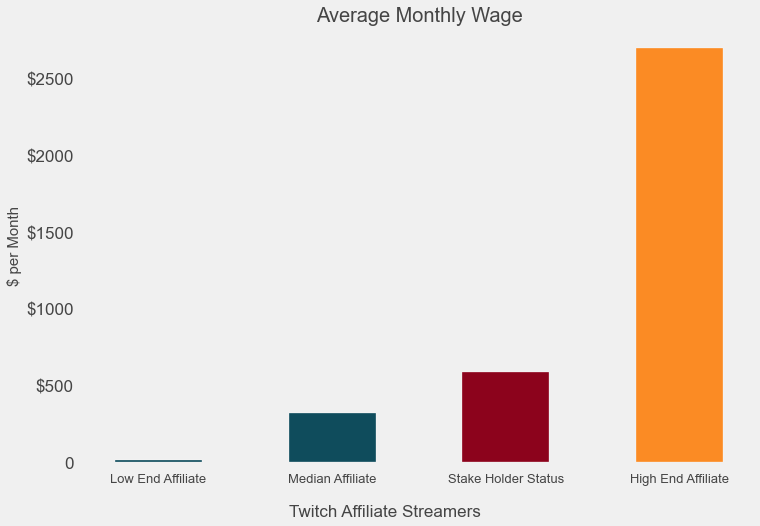

In [20]:

fig, ax = plt.subplots(figsize = (12,8))

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")


# set label axis
plt.ylabel("$ per Month",fontsize=15, color= "#454545")


ax.set_xticklabels(labels=affiliate_monthly_df.columns, fontsize=13, color= "#454545")
ax.set_yticklabels(labels=[0,"$500", "$1000","$1500","$2000", "$2500", "$3000"], fontsize=17, color= "#454545")

# make graph 
plt.bar(x=affiliate_monthly_df.columns, height=affiliate_monthly_df.loc[0,:], width=.5,
        color= ["#0f4c5c","#0f4c5c", "#8C031C", "#fb8b24",])



# set title
plt.title('Average Monthly Wage', fontsize=20, color= "#454545")

# Subtitle
subtitle_ = "Twitch Affiliate Streamers"
ax.text(s=subtitle_ ,fontsize=17, color= "#454545",
           x = .75, y= -350)

#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('bar_chart_twitch_affiliate_average_monthly_wage_comparison.png')
plt.show()

In [23]:
# This is how many times a game was streamed.  I should plot this.  
twitch_df.loc[:, "DST":"other_game"].sum().sort_values(ascending=False)

DST                 320.0
Jackbox             205.0
Chatting            164.0
other_game          122.0
Drawful2            117.0
Stardew              79.0
7D2D                 58.0
DD                   27.0
Subnautica           24.0
Hollow_Knight        21.0
Cuphead              20.0
ARK                  15.0
Graveyard_Keeper     13.0
Use_Your_Words       12.0
Choice_Chamber       11.0
Marbles               8.0
ONI                   8.0
Terraria              7.0
Escapists2            6.0
Moonlighter           6.0
Dream_Daddy           6.0
dtype: float64

In [24]:
# turn this into a list so I can zip and turn into a df
game_columns = list(twitch_df.loc[:, "DST":"other_game"].columns)

In [25]:
game_columns

['DST',
 'ONI',
 'Chatting',
 'Stardew',
 'DD',
 'Drawful2',
 'Cuphead',
 'Terraria',
 'Escapists2',
 'Choice_Chamber',
 'Jackbox',
 'Hollow_Knight',
 'Subnautica',
 'Use_Your_Words',
 'Moonlighter',
 'Graveyard_Keeper',
 'Marbles',
 '7D2D',
 'Dream_Daddy',
 'ARK',
 'other_game']

In [26]:
g_data = list(twitch_df.loc[:, "DST":"other_game"].sum())
g_data

[320.0,
 8.0,
 164.0,
 79.0,
 27.0,
 117.0,
 20.0,
 7.0,
 6.0,
 11.0,
 205.0,
 21.0,
 24.0,
 12.0,
 6.0,
 13.0,
 8.0,
 58.0,
 6.0,
 15.0,
 122.0]

In [27]:
game_count_tuple = list(zip(game_columns, g_data))

In [28]:
game_count_tuple

[('DST', 320.0),
 ('ONI', 8.0),
 ('Chatting', 164.0),
 ('Stardew', 79.0),
 ('DD', 27.0),
 ('Drawful2', 117.0),
 ('Cuphead', 20.0),
 ('Terraria', 7.0),
 ('Escapists2', 6.0),
 ('Choice_Chamber', 11.0),
 ('Jackbox', 205.0),
 ('Hollow_Knight', 21.0),
 ('Subnautica', 24.0),
 ('Use_Your_Words', 12.0),
 ('Moonlighter', 6.0),
 ('Graveyard_Keeper', 13.0),
 ('Marbles', 8.0),
 ('7D2D', 58.0),
 ('Dream_Daddy', 6.0),
 ('ARK', 15.0),
 ('other_game', 122.0)]

In [29]:
game_freq_df = pd.DataFrame(game_count_tuple, columns=["Game", "Days"])

In [30]:
game_freq_df.shape

(21, 2)

<AxesSubplot:ylabel='Game'>

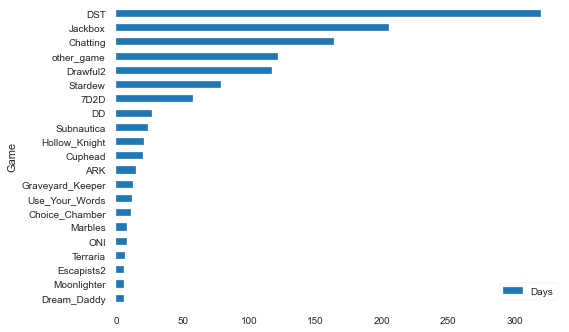

In [31]:
game_freq_df.set_index("Game").head(21).sort_values(by="Days").plot.barh()

In [32]:
# I should change all other games to other.

In [33]:
twitch_df.head(2)

,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
0,2017-06-13,736493,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
1,2017-06-14,736494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth


In [34]:
# create a list of columns that are not in the top 20 played games
# bottom_games_streamed=twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
# bottom_games_streamed

In [35]:
# # 
# other_sum = []
# for row, value in twitch_df.loc[:, bottom_games_streamed]: # I think problem is here
#     curr_sum =value.sum()  ## <---- I'm stuck here
#     other_sum.append(curr_sum)
# other_sum

In [ ]:
# row_list = [sum(list(x)) for x in twitch_df.loc[:, bottom_games_streamed]]

In [ ]:

# other_sum = []
# for index, row in twitch_df.loc[:, bottom_games_streamed].iterrows(): 
#     curr_sum = row.sum()
#     other_sum.append(curr_sum)
# other_sum

In [ ]:
# concerned_columns_df = twitch_df[bottom_games_streamed]
# other_sum = []
# for i in range(len(concerned_columns_df)):
#     row = concerned_columns_df.iloc[i]
#     other_sum.append(row.sum())

In [ ]:
# bottom_games_streamed=twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
# bottom_games_streamed

In [36]:
# last one - create earnings_cat
twitch_df["Total_Earnings"].describe()

count    1159.000000
mean       19.597481
std        54.431782
min         0.000000
25%         0.127750
50%         4.590000
75%        14.645000
max       672.210000
Name: Total_Earnings, dtype: float64

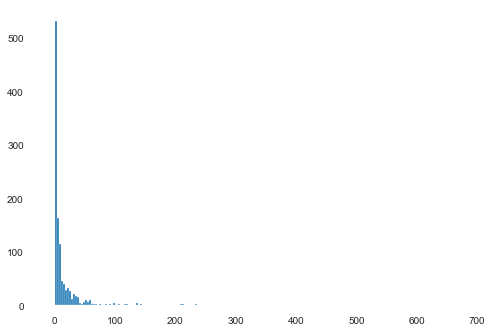

In [37]:
plt.hist(twitch_df["Total_Earnings"], bins=200)
plt.show()

In [38]:
temp_df = twitch_df.copy()

In [39]:
# temp_df["total_earning_cat"] = pd.qcut(twitch_df["Total_Earnings"], 3, labels=["not worth", "kinda worth", "def worth!"])
# temp_df.head(2)

In [40]:
# plt.hist(temp_df["total_earning_cat"], bins=200)
# plt.show()

In [43]:
temp_df["total_earn_cat"].value_counts()


not worth      390
def worth!     386
kinda worth    383
Name: total_earn_cat, dtype: int64

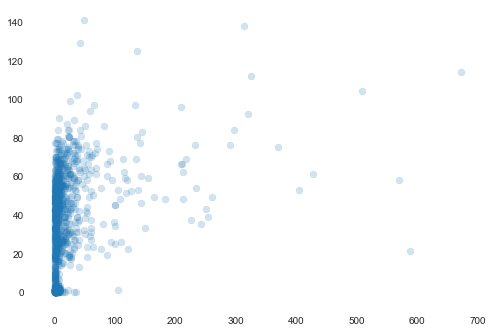

In [44]:
plt.scatter(twitch_df["Total_Earnings"],
            twitch_df["Chatters"], alpha=.2)
plt.show()

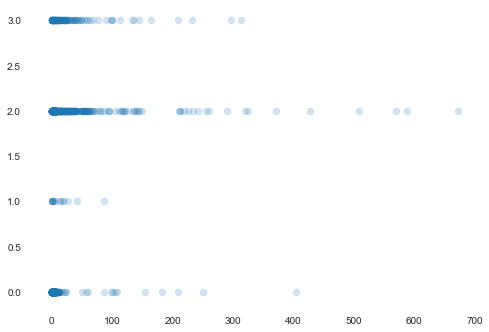

In [45]:
plt.scatter(twitch_df["Total_Earnings"],
            twitch_df["player_mode"], alpha=.2)
plt.show()

In [58]:
cross=pd.crosstab(twitch_df["Total_Earnings"], twitch_df["player_mode"])
cross.head(20)

player_mode,0.0,1.0,2.0,3.0
Total_Earnings,,,,
0.0000,182,5,47,8
0.0035,10,0,2,0
0.0070,3,0,0,0
0.0100,0,0,2,0
0.0140,2,0,0,0
0.0200,0,0,2,0
0.0300,0,0,2,0
0.0350,1,0,0,0
0.0420,1,0,0,0


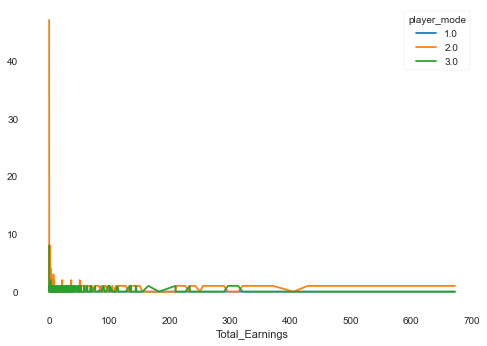

In [62]:
cross.drop(0, axis=1).plot();

In [63]:
## I have to do a visualizion of player_mode and mean income
cond_plm01 = twitch_df["player_mode"] == 1 
cond_plm01

0        True
1        True
2       False
3       False
4       False
        ...  
1154    False
1155    False
1156    False
1157    False
1158    False
Name: player_mode, Length: 1159, dtype: bool

In [64]:
single_df = twitch_df[cond_plm01]
single_df["Total_Earnings"].mean()

15.2802

In [65]:
cond_plm02 = twitch_df["player_mode"] == 2 
cond_plm02

0       False
1       False
2        True
3        True
4        True
        ...  
1154    False
1155    False
1156    False
1157     True
1158     True
Name: player_mode, Length: 1159, dtype: bool

In [66]:
multi_df = twitch_df[cond_plm02]
multi_df["Total_Earnings"].mean()

30.980260162601628

In [67]:
cond_plm03 = twitch_df["player_mode"] == 3 
cond_plm03

0       False
1       False
2       False
3       False
4       False
        ...  
1154    False
1155    False
1156    False
1157    False
1158    False
Name: player_mode, Length: 1159, dtype: bool

In [68]:
mixed_df = twitch_df[cond_plm03]
mixed_df["Total_Earnings"].mean()

27.399201986754964

### The mean rev for multi-player games only is highest


In [69]:
def get_confidence_interval(sample, confidence_level):
    from scipy import stats


    # in because we like some np functions 
    # make a np array for our sample
    sample_np_array = np.array(sample)

    # variables we need for the calculations are 
    # std_dev, sample size, t-statistic

    std_dev = np.std(sample_np_array, ddof=1)
    sample_size = sample_np_array.shape[0]

    #here's the new one: from scipy stats 
    # Percent Point Function (Inverse of CDF)
    # this value take ?? percent of data that  as a parameter
    # does same thing as university of I. applet
    tstat = stats.t.ppf(1 - ((1 - confidence_level) / 2), sample_size-1)

    # need the sample mean as x_bar
    x_bar = np.mean(sample_np_array)

    # I need the standard error =
    # standard deviation / squareroot of sample size
    std_err = (std_dev/np.sqrt(sample_size))

    # now I need the Margin of Error
    # which is tstat * standard error
    moe = tstat*std_err

    # then for info purposes lets return the 
    # lower and upper bounds

    lower_bound = x_bar - moe
    upper_bound = x_bar + moe

    confidence_int = namedtuple("confidence_interval", ["lower_bound", "xbar","upper_bound","moe", ])

    # return (lower_bound, x_bar, upper_bound, moe)
    return confidence_int(lower_bound, x_bar, upper_bound, moe)

In [70]:
singlepl_sample_values = get_confidence_interval(single_df["Total_Earnings"], .95)
multipl_sample_values = get_confidence_interval(multi_df["Total_Earnings"], .95)
mixedpl_sample_values = get_confidence_interval(mixed_df["Total_Earnings"], .95)

In [71]:
lightbl_color = "#4780b3"
lighto_color = "#ffb25e"
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
best_color ="#8C031C"

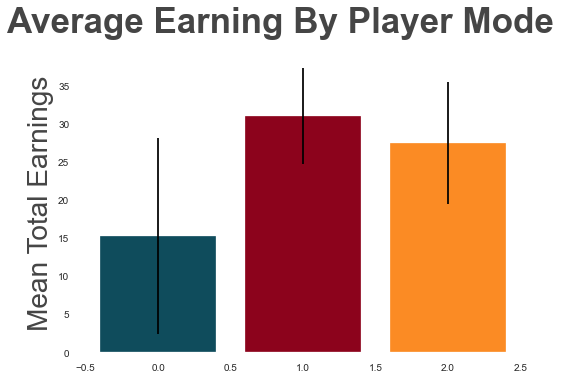

In [72]:
plt.gca()
# #  figsize=(10,10)

# plt.figure(figsize=(10,10))


# fig, ax = plt.subplots(figsize = (10,10))



# this graph I"m keeping and improving
plt.bar(0, height=singlepl_sample_values.xbar, yerr=singlepl_sample_values.moe,
        color=worse_color)
plt.bar(1, height=multipl_sample_values.xbar, yerr=multipl_sample_values.moe,
        color=best_color)
plt.bar(2, height=mixedpl_sample_values.xbar, yerr=mixedpl_sample_values.moe,
        color=middle_color)

plt.title('Average Earning By Player Mode')

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")

# label the x and y axis


plt.ylabel("Mean Total Earnings", fontsize=28, color= "#454545")

# adjust  y ticks 
# ax.set_yticklabels(labels=[0, 200, 400, 600,800], fontsize=28, color= "#454545")

# get rid of x ticks/labels
ax.axes.xaxis.set_visible(False)

# table at bottom

# lightbl_color = "#4780b3"
# lighto_color = "#ffb25e"
# middle_color = "#fb8b24"
# worse_color= "#0f4c5c"
# dnd_color ="#8C031C"

# colors = [["#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#4f6b75", "#4f6b75"],
#           [ "#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#b36969", "#b36969"]]

# cellText=[]
# for row in ev_comparison_df["Services"]:
#   cellText.append(row)
# table = plt.table(cellText=ev_comparison_df.iloc[:,1:].values,
#                   rowLabels=ev_comparison_df["Services"],
#                   colLabels=ev_comparison_df.columns[1:],
#                   cellColours=colors, 
#                   loc='bottom')

# table.set_fontsize(25)
# table.scale(1,4)

# add title
ev_title = "Average Earning By Player Mode"
plt.title(ev_title, fontsize=35, color= "#454545", fontweight = "bold", x =.45, y=1.05)


#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



# plt.savefig('ev_sales_mu_v_hair.png')

plt.show()

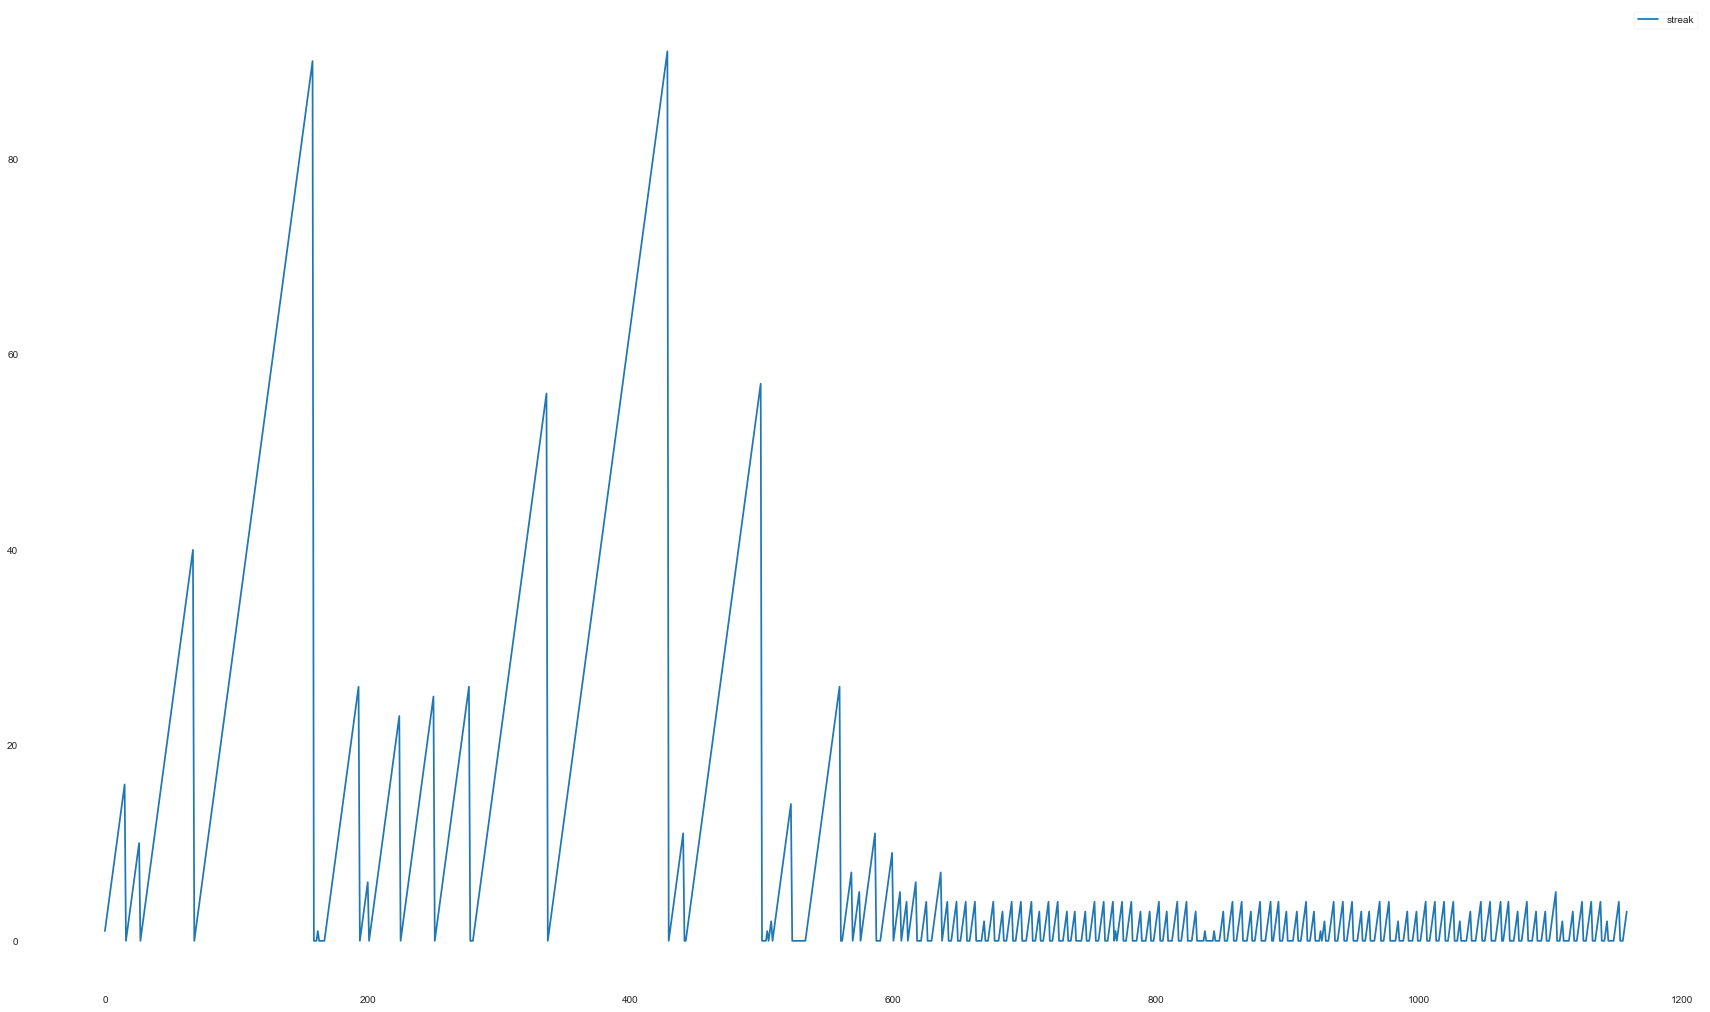

In [73]:
twitch_df.plot( y="streak", figsize =(30,18))


plt.savefig('streak_line_chart.png')

plt.show()

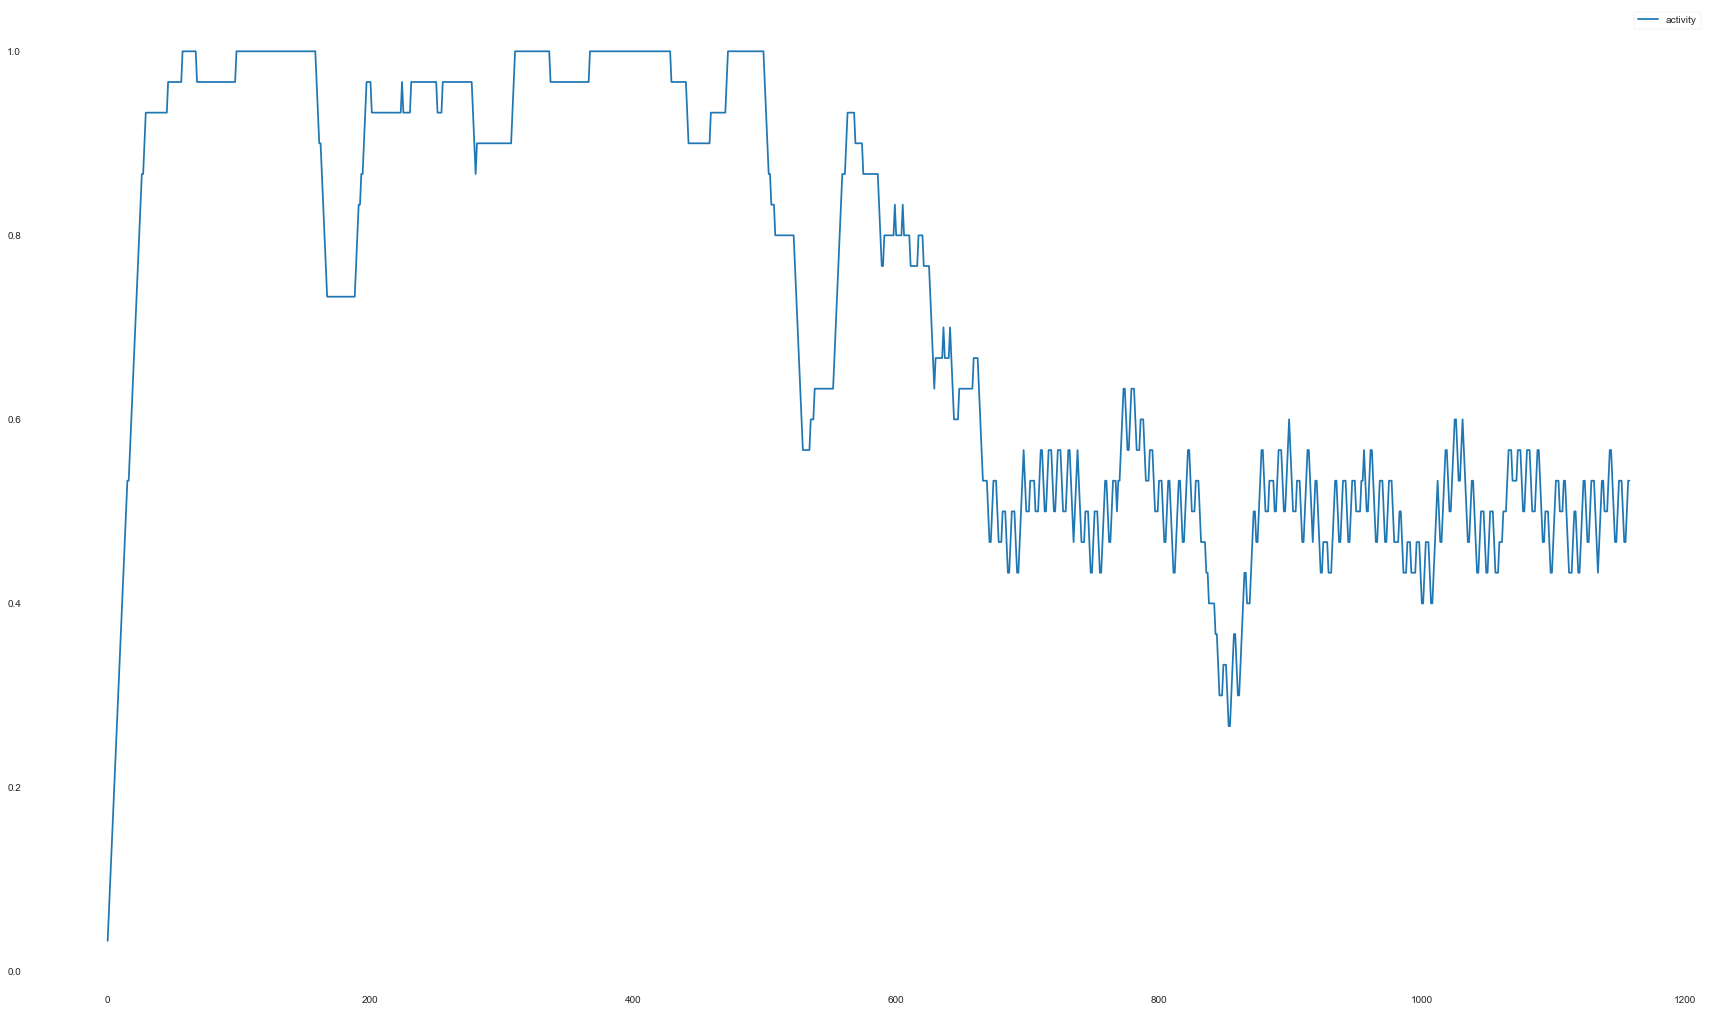

In [74]:
twitch_df.plot( y="activity", figsize =(30,18))

plt.savefig('activity_line_chart.png')

plt.show()

In [75]:
twitch_df["player_mode"].value_counts()

0.0    501
2.0    492
3.0    151
1.0     15
Name: player_mode, dtype: int64

In [76]:
twitch_df.columns

Index(['Date', 'stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
       'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Sub Revenue',
       'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue', 'Ad Revenue',
       'Extensions Revenue', 'Bounties Revenue', 'donations', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs',

In [77]:
corr_list = ['stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
        'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Total_Earnings',
       'total_earn_cat']

In [78]:
twitch_subset01_df = twitch_df[corr_list]
twitch_subset01_df.shape

(1159, 47)

In [79]:

# correlation matrix stuff - to see linear correlations
corr_matrix = twitch_subset01_df.corr()

In [80]:
corr_matrix["Total_Earnings"].sort_values(ascending=False)

Total_Earnings                 1.000000
Chatters                       0.333766
Chat Messages                  0.298061
Unique Viewers                 0.280546
Live Views                     0.278025
Clips Created                  0.261347
Hosts and Raids Viewers (%)    0.237196
Minutes Streamed               0.232080
Max Viewers                    0.215254
player_mode                    0.202948
Average Viewers                0.197042
Chatting                       0.193005
Marbles                        0.146199
avg_message_per_viewer         0.140919
other_game                     0.136930
DST                            0.129087
Jackbox                        0.112173
day_of_week_3                  0.107523
Escapists2                     0.105613
day_of_week_2                  0.090846
Stardew                        0.084417
Drawful2                       0.067253
7D2D                           0.058255
user_chatting_percent          0.056528
day_of_week_1                  0.055382


In [81]:
## NOTE: this is Absolute Value of correlation Matrix!!

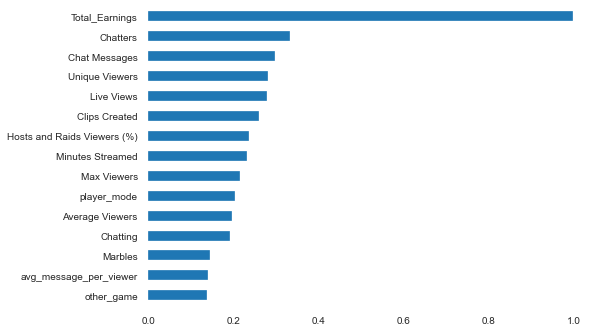

In [82]:
corr_matrix["Total_Earnings"].abs().sort_values().tail(15).plot.barh()

plt.savefig('corr_Matrix_absolute_value_chart.png')

plt.show()

In [83]:
# twitch_df["Extensions Revenue"]= twitch_df["Extensions Revenue"].astype(str).astype(float)

In [84]:
# twitch_df["Bounties Revenue"]= twitch_df["Bounties Revenue"].astype(str).astype(float)

In [85]:
# twitch_df["Tier 2 subs"]= twitch_df["Tier 2 subs"].astype(str).astype(float)

In [86]:
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1159 non-null   datetime64[ns]
 1   stream_date_id               1159 non-null   int64         
 2   player_mode                  1159 non-null   float64       
 3   DST                          1159 non-null   float64       
 4   ONI                          1159 non-null   float64       
 5   Chatting                     1159 non-null   float64       
 6   Stardew                      1159 non-null   float64       
 7   DD                           1159 non-null   float64       
 8   Drawful2                     1159 non-null   float64       
 9   Cuphead                      1159 non-null   float64       
 10  Terraria                     1159 non-null   float64       
 11  Escapists2                   1159 non-null 

In [87]:
twitch_df.describe(include="all")

<ipython-input-87-0ce9870adc2c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  twitch_df.describe(include="all")


,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
count,1159,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159
unique,1158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2004-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not worth
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390
first,2004-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-08-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,737057.805867,1.252804,0.27610,0.006903,0.141501,0.068162,0.023296,0.100949,0.017256,0.006040,0.005177,0.009491,0.176877,0.018119,0.020708,0.010354,0.005177,0.011217,0.006903,0.050043,0.005177,0.012942,0.105263,21.841096,1163.233822,32.854185,9.550475,1.616911,6.120794,5.237394,171.141501,39.040552,4862.647972,170.433995,112.671268,0.143227,0.143227,0.142364,0.142364,0.142364,0.143227,0.143227,13.141501,0.718148,7.981109,27.384029,2.195889,0.566165,4.809927,6.515626,0.01092,0.003486,0.037101,5.495470,0.22692,0.849871,0.759275,0.087144,0.003451,2.026747,2.018119,0.006040,0.002588,14.102011,19.597481,NaN
std,NaN,435.739214,1.146794,0.44726,0.082830,0.348688,0.252133,0.150907,0.301391,0.130281,0.077514,0.071795,0.097000,0.381729,0.133440,0.142465,0.101269,0.071795,0.105358,0.082830,0.218128,0.071795,0.113074,0.395525,30.263970,1198.362025,26.488704,27.860354,2.420749,15.560376,7.431766,184.835591,57.301411,5

In [ ]:
# I need to identify days that were single player, multiplayer, or both.  
# I will hardcode this into the twitch_clean_data_Kelly

In [ ]:
twitch_df.nunique()

In [ ]:
# temp_df = pd.DataFrame()
# temp_df["stream_date_id"] = twitch_df["Date"].map(datetime.datetime.toordinal)
# temp_df.head()

## Create the Feature Matrix from here


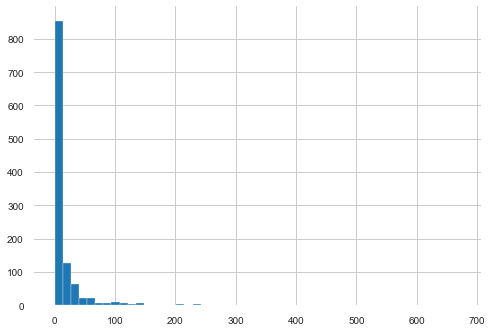

In [88]:
twitch_df['Total_Earnings'].hist(bins=50);

In [89]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

19.597481449525453

In [90]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

  return naive_baseline(guess, errors, mean_absolute_error)

In [91]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [92]:
y_target = twitch_df['Total_Earnings']

In [93]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.


In [94]:
twitch_df["avg_message_per_viewer"].isnull().sum()

0

In [95]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*400716))
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings']),
#                         twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings'].iloc[:,0])))
# print('\nTraining MAE:\n', mean_absolute_error(y_train, boost_model.predict(X_train)))

In [96]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*len(df['price'])))
print("Baseline RMSE:\n", math.sqrt(mean_squared_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))

Baseline RMSE:
 54.40829458760197


In [98]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

19.597481449525453
24.54002158371927
(1159,)


In [ ]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

# #   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
#   r2 = r2_score(target_feature, y_pred)

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

#   return naive_baseline(guess, errors, mean_absolute_error, r2)

In [ ]:
# nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [ ]:
# nbaseline

In [ ]:
# twitch_df['Total_Earnings'].mean()

In [ ]:
# a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
# a

### y_pred = column of average predictions

In [ ]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [102]:
t_mse=mean_squared_error(y_target, y_pred)
t_rmse= mean_squared_error(y_target, y_pred, squared=False)

In [103]:
print(t_mse)
print(t_rmse)

2960.2625199312783
54.40829458760197


### R2 - ratio of difference of prediction and actual values

In [104]:
r2 = r2_score(y_target, y_pred)
print(r2)

0.0


In [ ]:
np.set_printoptions(threshold=sys.maxsize)
twitch_df.columns

# short list a Feature Matrix
short_list = ['stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
        'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Total_Earnings',
       'total_earn_cat']

In [ ]:
# short_list = ['Average Viewers', 'Chat Messages', 'Chatters',
#               'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
#        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
#          'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
#        'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
#         'Total_Earnings', 'streak', 'avg_message_per_viewer',
#         'activity', 'user_chatting_percent']

In [105]:
long_list = [ 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
        'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Total_Earnings',
       'total_earn_cat']

# Fork the feature Matrix for future use


In [106]:
# feature_matrix_df = twitch_df[short_list]
# fork the feature Matrix for future use

feature_matrix_df = twitch_df[long_list]

In [113]:
# Make a function to create Matrix and Target pre validation split
def create_regression_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop(["Total_Earnings"] , axis=1)
  return (X_matrix, y_target)

In [114]:
# Make a function to create Matrix and Target pre validation split
def create_classification_Xmatrix_ytarget(training_df):
  y_target = training_df['total_earn_cat']
  X_matrix = training_df.drop(["Total_Earnings",'total_earn_cat'] , axis=1)
  return (X_matrix, y_target)

In [115]:
X_matrix, y_target = create_regression_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 45)
(1159,)


In [116]:
X_matrix.columns

Index(['player_mode', 'DST', 'ONI', 'Chatting', 'Stardew', 'DD', 'Drawful2',
       'Cuphead', 'Terraria', 'Escapists2', 'Choice_Chamber', 'Jackbox',
       'Hollow_Knight', 'Subnautica', 'Use_Your_Words', 'Moonlighter',
       'Graveyard_Keeper', 'Marbles', '7D2D', 'Dream_Daddy', 'ARK',
       'other_game', 'Average Viewers', 'Chat Messages', 'Chatters',
       'Clip Views', 'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)',
       'Live Views', 'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'total_earn_cat'],
      dtype='object')

# Train Val Test split

In [111]:
from sklearn.model_selection import train_test_split

In [118]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20,
    stratify= X_matrix['total_earn_cat'], random_state=42)

In [119]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 45)
(927,)
(232, 45)
(232,)


In [121]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20,
    stratify= X_train_temp['total_earn_cat'],random_state=42)

In [124]:
X_train = X_train.drop('total_earn_cat', axis=1)
X_val = X_val.drop('total_earn_cat', axis=1)
X_test = X_test.drop('total_earn_cat', axis=1)

In [125]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 44)
(741,)
(186, 44)
(186,)
(232, 44)
(232,)


# Let's make a pipeline!  (finally...!)

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import RidgeCV

In [ ]:
# lr_model = make_pipeline(
#     SelectKBest(),
#     LinearRegression(normalize=True)
# )

In [127]:
lr_model = make_pipeline(
    SelectKBest(),
    RidgeCV(scoring='neg_mean_absolute_error',
           cv=15)
)

### Short list transforms - SelectKBest, 

### Linear Model - Ridge Regression


In [128]:
lr_model.fit(X_train, y_train)

/Users/kellycho/.local/share/virtualenvs/StarKells_Twitch_data-N6g9n_I3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest()),
                ('ridgecv',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=15,
                         scoring='neg_mean_absolute_error'))])

## Grid Search here would be good.  

In [129]:
training_MAE = mean_absolute_error(y_train, lr_model.predict(X_train))

In [130]:
training_MSE=mean_squared_error(y_train, lr_model.predict(X_train))

In [131]:
training_RMSE=mean_squared_error(y_train, lr_model.predict(X_train), squared=False)

In [132]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [133]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [134]:
validation_MSE = mean_squared_error(y_val, lr_model.predict(X_val))

In [135]:
validation_RMSE = mean_squared_error(y_val, lr_model.predict(X_val), squared=False)
validation_r2_01 =  r2_score(y_val, lr_model.predict(X_val))

In [137]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
#                         [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Training MSE: {training_MSE}")
print(f"Training RMSE: {training_RMSE}")

print()
print(f"Validation MAE: {validation_MAE}")
print(f"Validation MSE: {validation_MSE}")
print(f"Validation RMSE: {validation_RMSE}")
print(f"Validation R^2: {validation_r2_01}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 25.859525453313523
Training MSE: 3486.079006484946
Training RMSE: 59.04302673885331

Validation MAE: 20.39515182264181
Validation MSE: 1150.2311757896243
Validation RMSE: 33.91505824541105
Validation R^2: 0.1666753288216105


In [138]:
response_var_column01 = lr_model.predict(X_train)
training_rsme01 = mean_squared_error(y_train, response_var_column01, squared=False)
training_r2_01 = r2_score(y_train, response_var_column01)

val_r2_01 =  r2_score(y_val, lr_model.predict(X_val))


In [139]:
print(f"Training RMSE: {training_rsme01}")
print(f"Training R^2: {training_r2_01}")

print()

print(f"Validation R^2: {val_r2_01}")



Training RMSE: 59.04302673885331
Training R^2: 0.06663376094123385

Validation R^2: 0.1666753288216105


### Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rf_bag_model = make_pipeline(
    RandomForestRegressor(random_state=42,
                           n_estimators=505)
)

In [142]:
rf_bag_model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(n_estimators=505, random_state=42))])

In [143]:
training_MAE = mean_absolute_error(y_train, rf_bag_model.predict(X_train))
training_MSE=mean_squared_error(y_train, rf_bag_model.predict(X_train))
training_RMSE=mean_squared_error(y_train, rf_bag_model.predict(X_train), squared=False)
training_r2_02 = r2_score(y_train, rf_bag_model.predict(X_train))


In [144]:
validation_MAE = mean_absolute_error(y_val, rf_bag_model.predict(X_val))
validation_MSE = mean_squared_error(y_val, rf_bag_model.predict(X_val))
validation_RMSE = mean_squared_error(y_val, rf_bag_model.predict(X_val), squared=False)
validation_r2_02 = r2_score(y_val, rf_bag_model.predict(X_val))

In [145]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
#                         [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Training MSE: {training_MSE}")
print(f"Training RMSE: {training_RMSE}")
print(f"Training R2: {training_r2_02}")

print()
print(f"Validation MAE: {validation_MAE}")
print(f"Validation MSE: {validation_MSE}")
print(f"Validation RMSE: {validation_RMSE}")
print(f"Validation R^2: {validation_r2_02}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 8.88715832065566
Training MSE: 459.00050649870343
Training RMSE: 21.424297106292737
Training R2: 0.877106750684707

Validation MAE: 20.50406919056999
Validation MSE: 1902.6200967964849
Validation RMSE: 43.61903365271272
Validation R^2: -0.3784187908590577


In [ ]:
# response_var_column03 = rf_bag_model.predict(X_train)
# model_rsme03 = mean_squared_error(y_train, response_var_column03, squared=False)
# model_r2_03 = r2_score(y_train, response_var_column03)

In [ ]:
# print(f"Model RMSE: {model_rsme03}")
# print(f"Model R^2: {model_r2_03}")

## try the GradientBoostingRegressor

In [146]:
from sklearn.ensemble import GradientBoostingRegressor

In [147]:
rf_boost_model = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [148]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model.predict(X_train))

In [149]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model.predict(X_val))

In [150]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 10.536934514444486
Validation MAE: 19.660653634007083


In [151]:
response_var_column_train = rf_boost_model.predict(X_train)
training_rsme = mean_squared_error(y_train, response_var_column_train, squared=False)
training_r2 = r2_score(y_train, response_var_column_train)

response_var_column_val = rf_boost_model.predict(X_val)
val_rsme = mean_squared_error(y_val, response_var_column_val, squared=False)
val_r2 = r2_score(y_val, response_var_column_val)

In [152]:
print(f"Training RMSE: {training_rsme}")
print(f"Training R^2: {training_r2}")

print()
print(f"Validation RMSE: {val_rsme}")
print(f"Validation R^2: {val_r2}")

Training RMSE: 19.80653423356429
Training R^2: 0.8949655319579006

Validation RMSE: 40.115183237117684
Validation R^2: -0.16586070751158188


 ### Try XGBoost
 

In [153]:

from xgboost import XGBRegressor

In [154]:
xgb_model = make_pipeline(
   XGBRegressor()
)
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [155]:
training_MAE07 = mean_absolute_error(y_train, xgb_model.predict(X_train))

In [156]:
validation_MAE07 = mean_absolute_error(y_val, xgb_model.predict(X_val))

In [157]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE07}")
print(f"Validation MAE: {validation_MAE07}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 0.6081515842439675
Validation MAE: 19.892619904430966


In [158]:
# response_var_column04 = xgb_model.predict(X_train)
# model_rsme02 = mean_squared_error(y_train, response_var_column04, squared=False)
# model_r2_02 = r2_score(y_train, response_var_column04)

In [159]:
response_var_column_train04 = xgb_model.predict(X_train)
training_rsme04 = mean_squared_error(y_train, response_var_column_train04, squared=False)
training_r2 = r2_score(y_train, response_var_column_train04)

response_var_column_val04 = xgb_model.predict(X_val)
val_rsme04 = mean_squared_error(y_val, response_var_column_val04, squared=False)
val_r204 = r2_score(y_val, response_var_column_val04)

In [160]:
# print(f"Model RMSE: {model_rsme02}")
# print(f"Model R^2: {model_r2_02}")

In [161]:
print(f"Training RMSE: {training_rsme04}")
print(f"Training R^2: {training_r2}")

print()
print(f"Validation RMSE: {val_rsme04}")
print(f"Validation R^2: {val_r204}")

Training RMSE: 0.9786037383396846
Training R^2: 0.999743593752201

Validation RMSE: 40.85486319017281
Validation R^2: -0.2092514760002031


## Feature Importances

In [ ]:
# rf_bag_model = make_pipeline(
#     RandomForestRegressor(random_state=42)
# )

In [ ]:
# rf_bag_model.fit(X_train, y_train)

In [169]:
fi01= rf_bag_model.named_steps["randomforestregressor"].feature_importances_
fi02= rf_boost_model.named_steps["gradientboostingregressor"].feature_importances_

In [170]:
importances01 = pd.Series(fi01, X_train.columns).sort_values(ascending=False)
importances01
importances02 = pd.Series(fi02, X_train.columns).sort_values(ascending=False)
importances02

Chatters                       0.223396
Clips Created                  0.130676
Live Views                     0.092627
Average Viewers                0.081092
Hosts and Raids Viewers (%)    0.079903
Max Viewers                    0.078377
activity                       0.052396
user_chatting_percent          0.043235
Chat Messages                  0.039161
Minutes Streamed               0.034533
Unique Viewers                 0.033619
streak                         0.020865
avg_message_per_viewer         0.017888
player_mode                    0.011361
Clip Views                     0.010260
Follows                        0.009071
Stardew                        0.007325
other_game                     0.006870
Marbles                        0.004655
7D2D                           0.004596
Jackbox                        0.003451
day_of_week_1                  0.002432
day_of_week_2                  0.002302
Use_Your_Words                 0.002227
Chatting                       0.001506


<AxesSubplot:>

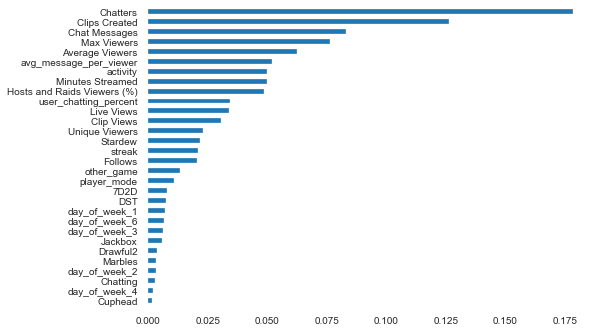

In [173]:
importances01.head(30).sort_values().plot(kind="barh")


<AxesSubplot:>

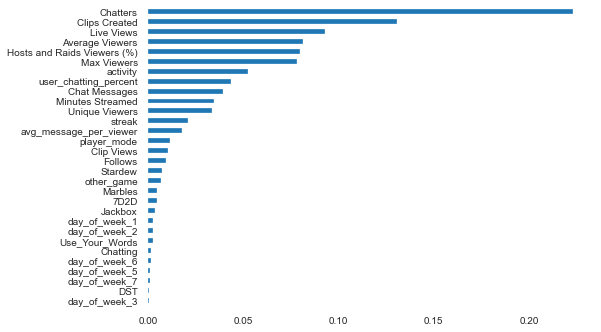

In [172]:
importances02.head(30).sort_values().plot(kind="barh")

## Drop Column

### Permutation IMportance
train model on full dataset
Choose a column an shuffle rows
See how the validation metrics change

In [ ]:
X_val["activity"].head(10)

In [ ]:
X_val_permuted = X_val.copy()

In [ ]:
np.random.permutation(X_val["activity"])[:10]

In [ ]:
X_val_permuted["activity"] = np.random.permutation(X_val_permuted["activity"])

In [ ]:
X_val_permuted["activity"].head(10)

In [ ]:
X_val_permuted["activity"].value_counts()

In [ ]:
X_val["activity"].value_counts()

In [174]:
rf_boost_model2 = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model2.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [175]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val))

In [176]:
validation_MAE3 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val_permuted))

NameError: name 'X_val_permuted' is not defined

In [177]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model2.predict(X_train))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")
print(f"Validation MAE Permuted: {validation_MAE3}")

In [ ]:
response_var_column06 = rf_boost_model2.predict(X_train)
model_rsme06 = mean_squared_error(y_train, response_var_column06, squared=False)
model_r2_06 = r2_score(y_train, response_var_column06)

In [ ]:
print(f"Model RMSE: {model_rsme06}")
print(f"Model R^2: {model_r2_06}")

### Automate it. 

In [178]:
from sklearn.inspection import permutation_importance

In [179]:
pi = permutation_importance(rf_boost_model2, X_val, y_val)

In [ ]:
type(pi)

In [ ]:
pi

In [180]:
pi_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [181]:
pi_df.sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
Chatters,0.6407,0.067107
activity,0.5895,0.208517
Clips Created,0.5869,0.160911
Chat Messages,0.4739,0.111002
Live Views,0.4336,0.042121
Average Viewers,0.1749,0.041960
Unique Viewers,0.1435,0.029433
streak,0.0989,0.063473
Max Viewers,0.0826,0.046514
user_chatting_percent,0.0742,0.032596


## I will use this graph in conclusion for the appropriate Model


<AxesSubplot:>

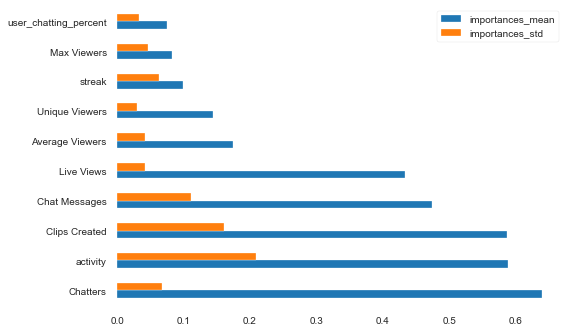

In [182]:
pi_df.sort_values(by="importances_mean", ascending=False).head(10).plot(kind="barh")

### Compare Permutation importance (top 15) with SelectKBest(Default)

In [ ]:
perm_shortlist = pi_df.sort_values(by="importances_mean", ascending=False).head(33).index

In [ ]:
perm_shortlist

In [ ]:
lr_perm_model = make_pipeline(
    LinearRegression()
)

lr_perm_model.fit(X_train[perm_shortlist], y_train)

In [ ]:
training_MAE4 = mean_absolute_error(y_train, lr_perm_model.predict(X_train[perm_shortlist]))

In [ ]:
validation_MAE4 = mean_absolute_error(y_val, lr_perm_model.predict(X_val[perm_shortlist]))

## original lr w/ SelectKBest

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

## lr w/ Perm Importance Shortlist

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE4}")
print(f"Validation MAE: {validation_MAE4}")

## Make some Classification Models
### Use Majority Classifier/Accuracy as metric


#### I actually have to fork my Feature Matrix.  

In [ ]:
feature_matrix_df.head(2)

In [189]:
# fork the feature Matrix for future use
X_matrix, y_target = create_classification_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 44)
(1159,)


In [ ]:
X_matrix.head(2)

In [ ]:
y_target.head(2)

## Baseline Accuracy


In [190]:
print('Baseline Accuracy:', y_target.value_counts(normalize=True).max())

Baseline Accuracy: 0.3364969801553063


In [191]:
y_target.head()

0    not worth
1    not worth
2    not worth
3    not worth
4    not worth
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

## Baseline Metrics Table

In [321]:
# Baseline Metrics table

baseline_metrics_df = pd.DataFrame({"Machine Learning Task": ["Regression", "Classification"],
                                    "Mean Absolute Error(MAE)": [24.54, "-"],"Majority Classifier/Accuracy": ["-",0.336]})
baseline_metrics_df


,Machine Learning Task,Mean Absolute Error(MAE),Majority Classifier/Accuracy
0,Regression,24.54,-
1,Classification,-,0.336


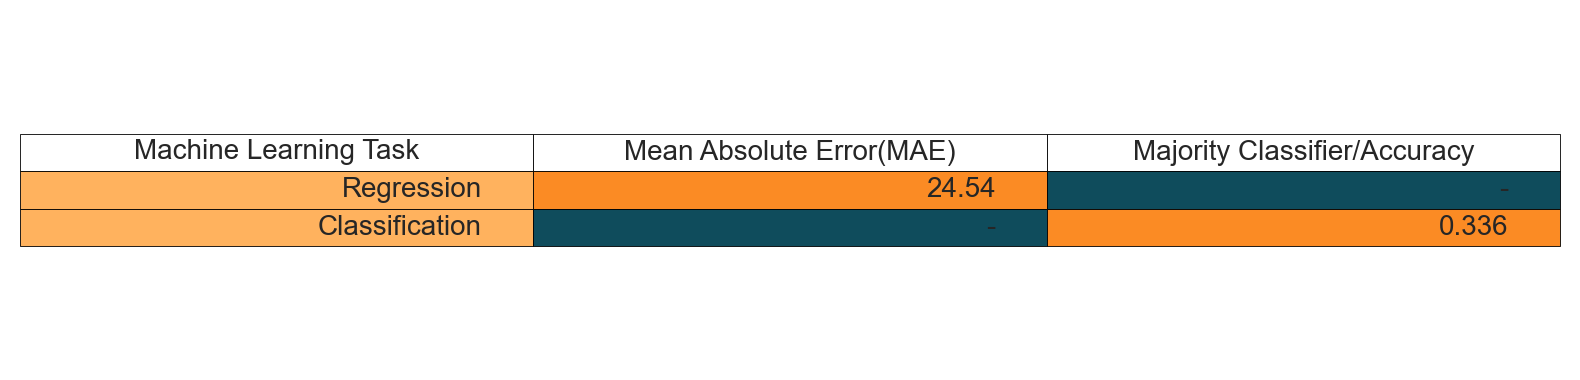

In [381]:
fig, axs = plt.subplots(figsize=(8,2))


lightbl_color = "#4780b3"
lighto_color = "#ffb25e"
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
dnd_color ="#8C031C"

plt.rcParams['figure.dpi'] = 200
fig.patch.set_visible(False)
axs.axis("tight")
axs.axis("off")

colors = [[lighto_color,middle_color,worse_color],
          [lighto_color, worse_color, middle_color]]

axs.table(cellText=baseline_metrics_df.values,
          colLabels=baseline_metrics_df.columns,
          cellColours=colors,
                  loc = "center"
                  )
table.set_fontsize(25)
# table.scale(1,1)

fig.tight_layout()

plt.savefig('baseline_metrics_table.png')


plt.show()

#### Train/Val/Test Split

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20,
    stratify=y_target, random_state=42)

In [194]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 44)
(927,)
(232, 44)
(232,)


In [195]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20,
    stratify=y_train_temp,random_state=42)

In [196]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 44)
(741,)
(186, 44)
(186,)
(232, 44)
(232,)


In [197]:
y_train.head()

130       not worth
224       not worth
258       not worth
1078      not worth
976     kinda worth
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

In [198]:
from sklearn.tree import DecisionTreeClassifier # decision Tree for classification problems
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [199]:
class_tree_model_01 = make_pipeline(
    SelectKBest(),
    DecisionTreeClassifier(random_state=42)
)
# class_tree_model_01.fit(X_train, y_train)

In [200]:
param_grid = [
             { "selectkbest__k" : [5, 8, 10, 30],
              "decisiontreeclassifier__max_depth" : [8, 12, 15],
              "decisiontreeclassifier__min_samples_split" : [2, 4, 6, 10, 15]
             }
]
# forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(class_tree_model_01, param_grid, cv = 10,
                           scoring="accuracy",
                           return_train_score=True,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    4.3s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__max_depth': [8, 12, 15],
                          'decisiontreeclassifier__min_samples_split': [2, 4, 6,
                                                                        10,
                                                                        15],
                          'selectkbest__k': [5, 8, 10, 30]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [201]:
print('Best hyperparameters', grid_search.best_params_)

Best hyperparameters {'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_split': 15, 'selectkbest__k': 30}


In [202]:
best_model_class_t_01 = grid_search.best_estimator_
best_model_class_t_01

Pipeline(steps=[('selectkbest', SelectKBest(k=30)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=15,
                                        random_state=42))])

In [203]:
print(f"Training Accuracy: {best_model_class_t_01.score(X_train, y_train)}")
print(f"Validation Accuracy: {best_model_class_t_01.score(X_val, y_val)}")

Training Accuracy: 0.7260458839406208
Validation Accuracy: 0.543010752688172


In [204]:
print(f"Test Accuracy: {best_model_class_t_01.score(X_test, y_test)}")

Test Accuracy: 0.5043103448275862


### Confusion Matrix 


In [205]:
from sklearn.metrics import plot_confusion_matrix, classification_report

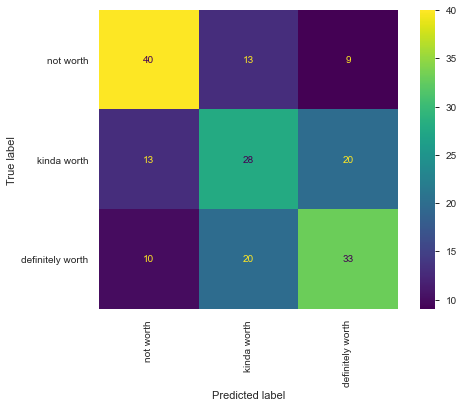

In [206]:
plot_confusion_matrix(best_model_class_t_01, X_val, y_val, 
                      values_format='.0f', 
                      display_labels=["not worth", "kinda worth", "definitely worth"],
                      xticks_rotation='vertical');


plt.savefig('twitch_tree_classifier_confusion_matrix_chart.png')

plt.show()

## Try Permutation Importance for this model


In [207]:
pi02 = permutation_importance(best_model_class_t_01, X_val, y_val)

In [208]:
pi02_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [219]:
pi02_df.sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
Chatters,0.6407,0.067107
activity,0.5895,0.208517
Clips Created,0.5869,0.160911
Chat Messages,0.4739,0.111002
Live Views,0.4336,0.042121
Average Viewers,0.1749,0.041960
Unique Viewers,0.1435,0.029433
streak,0.0989,0.063473
Max Viewers,0.0826,0.046514
user_chatting_percent,0.0742,0.032596


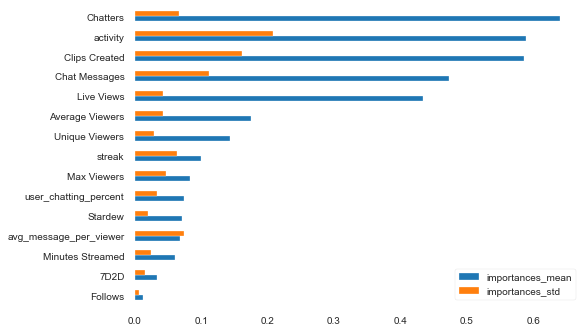

In [211]:
pi02_df.sort_values(by="importances_mean", ascending=False).head(15).sort_values(by="importances_mean").plot(kind="barh")

plt.savefig('twitch_tree_classifier_permutation_importance_top15_bar_chart.png')

plt.show()

### Fake for Shap plot

In [ ]:
temp_df = feature_matrix_df.copy()

In [ ]:
temp_df.head()

In [ ]:
temp_df = temp_df.drop("Total_Earnings", axis=1)
temp_df.head(2)

In [ ]:
temp_df["total_earn_cat"].value_counts()

In [ ]:
#  # replace the unknown game values with 0
#     replace_list = ["inf", "Unknown"]
#     df= df.replace(to_replace=replace_list, value=0)   
replace_list = ["not worth", "def worth!", "kinda worth"]
temp_df["total_earn_cat"] = temp_df["total_earn_cat"].replace(to_replace= replace_list, value=[0,1,2] )

In [ ]:
temp_df["total_earn_cat"].value_counts()

In [ ]:
fake_train, fake_val = train_test_split(temp_df, test_size=.2, random_state=42)

In [ ]:
fake_feat = ['player_mode','Chat Messages', 'Chatters','Minutes Streamed',
               'day_of_week_1', 'day_of_week_2', 'day_of_week_3',]

fake_target = ["total_earn_cat"]

In [ ]:
X_fake_train = fake_train[fake_feat]
y_fake_train = fake_train[fake_target]

X_fake_val = fake_val[fake_feat]
y_fake_val = fake_val[fake_target]

In [ ]:
class_tree_model_01 =  DecisionTreeClassifier(random_state=42)
class_tree_model_01.fit(X_fake_train, y_fake_train)

In [ ]:
class_tree_model_01.predict(X_fake_val)[28]

In [ ]:
fake_row = X_fake_val.iloc[[28]]
fake_row

## Install shap - maybe in reqs

In [ ]:
!pip install shap

In [ ]:
import shap 

In [ ]:
explainer = shap.TreeExplainer(class_tree_model_01)
shap_values = explainer.shap_values(fake_row) # must be 2D array 


In [ ]:
shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value[0], # the index is for which classification value is being explained
    shap_values=shap_values[0],
    features=fake_row)

In [ ]:
explainer.expected_value[0]

In [ ]:
shap_values

## Decision Tree Classifier Shap stuff


In [213]:
X_matrix, y_target = create_classification_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 44)
(1159,)


In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20,
    stratify=y_target, random_state=42)

In [216]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20,
    stratify=y_train_temp,random_state=42)

In [217]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 44)
(741,)
(186, 44)
(186,)
(232, 44)
(232,)


In [193]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20,
    stratify=y_target, random_state=42)

In [194]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 44)
(927,)
(232, 44)
(232,)


In [195]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20,
    stratify=y_train_temp,random_state=42)

In [196]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 44)
(741,)
(186, 44)
(186,)
(232, 44)
(232,)


In [222]:
pi02_df.sort_values(by="importances_mean", ascending=False).head(15).index

Index(['Chatters', 'activity', 'Clips Created', 'Chat Messages', 'Live Views',
       'Average Viewers', 'Unique Viewers', 'streak', 'Max Viewers',
       'user_chatting_percent', 'Stardew', 'avg_message_per_viewer',
       'Minutes Streamed', '7D2D', 'Follows'],
      dtype='object')

In [221]:
dtc_feat = ['Chatters', 'activity', 'Clips Created', 'Chat Messages', 'Live Views',
       'Average Viewers', 'Unique Viewers', 'streak', 'Max Viewers',
       'user_chatting_percent', 'Stardew', 'avg_message_per_viewer',
       'Minutes Streamed', '7D2D', 'Follows']

# dtc_target = ["total_earn_cat"]

In [225]:
X_train = X_train[dtc_feat]
# y_train = y_train[dtc_target]

X_val = X_val[dtc_feat]
# y_val = y_val[dtc_target]

In [291]:
class_tree_model_01 =  DecisionTreeClassifier(max_depth=8, min_samples_split=15,
                                        random_state=42)
class_tree_model_01.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=15, random_state=42)

In [304]:
class_tree_model_01.predict(X_val)[178]

'def worth!'

In [305]:
row = X_val.iloc[[178]]
row

,Chatters,activity,Clips Created,Chat Messages,Live Views,Average Viewers,Unique Viewers,streak,Max Viewers,user_chatting_percent,Stardew,avg_message_per_viewer,Minutes Streamed,7D2D,Follows
682,92,0.5,2,2790,450,36.7,333,2,90,27.627628,0.0,8.378378,343,0.0,13


In [306]:
y_val.iloc[[178]]

682    def worth!
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

In [277]:
y_val.tail(20)

153      def worth!
155      def worth!
1108      not worth
352       not worth
670     kinda worth
390       not worth
934      def worth!
253       not worth
534       not worth
834       not worth
920      def worth!
168       not worth
682      def worth!
481     kinda worth
494      def worth!
476      def worth!
663     kinda worth
888       not worth
428       not worth
879      def worth!
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

In [271]:
y_val.shape

(186,)

## Actual force plot!

In [237]:
!pip install shap

In [238]:
import shap 

In [295]:
explainer = shap.TreeExplainer(class_tree_model_01)
shap_values = explainer.shap_values(row) # must be 2D array 


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


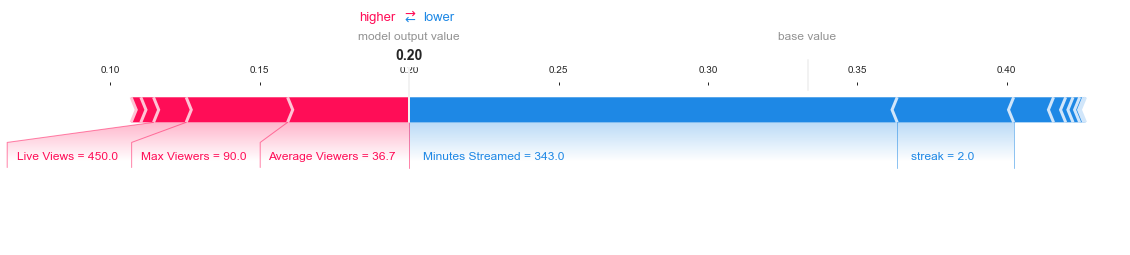

In [317]:
shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value[0], # the index is for which classification value is being explained
    shap_values=shap_values[0],
    features=row,
    show=False,
    matplotlib=True)


plt.savefig('twitch_tree_classifier_shapley_top15_chart.png')

plt.show()


## Table of Scores for Models


In [384]:
# Validation For Both, Test from Classification Metrics table

model_results_df = pd.DataFrame({"Machine Learning Model": ["Ridge Regression", "Decision Tree Classifier"],
                                    "Baseline Metric": ["MAE: 24.54", "Acc: 0.336"],
                                 "Validation Result": ["MAE: 20.395","Acc: 0.543"],
                                "Test Result": ["-", "Acc: 0.504"]})
model_results_df


,Machine Learning Model,Baseline Metric,Validation Result,Test Result
0,Ridge Regression,MAE: 24.54,MAE: 20.395,-
1,Decision Tree Classifier,Acc: 0.336,Acc: 0.543,Acc: 0.504


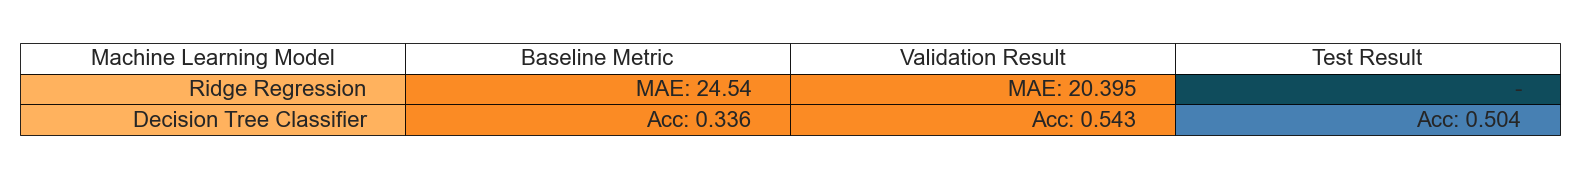

In [401]:
fig, axs = plt.subplots(figsize=(8,1))


lightbl_color = "#4780b3"
lighto_color = "#ffb25e"
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
dnd_color ="#8C031C"

# plt.rcParams['figure.dpi'] = 200
fig.patch.set_visible(False)
axs.axis("tight")
axs.axis("off")

colors = [[lighto_color,middle_color,middle_color, worse_color],
          [lighto_color, middle_color, middle_color, lightbl_color]]

axs.table(cellText=model_results_df.values,
          colLabels=model_results_df.columns,
          cellColours=colors,
                  loc = "center"
                  )
table.set_fontsize(800)
# table.scale(2,4)

fig.tight_layout()

plt.savefig('model_results_table.png')


plt.show()